# Plot up 2D (surface) oil thickness for the Strait of Georgia Point
## Comparing high tide and low tide results for:
  - Alaska North Slope Crude (AKNS)
  - Diesel
## 05jun2015-12jun2015: freshet, strong wind, strong current case (transition spring -> neap)

In [1]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime

## Load results

In [3]:
AKNS = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_05jun2015/Lagrangian_AKNS_crude_SOG_05jun15_12jun15_MediumFloater_AKNS_1000m3.nc')
diesel = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_05jun2015/Lagrangian_DieselFuel_refined_TP_05jun15_12jun15_LightEvaporatorsDiesel_1000m3.nc')

## Extract surface thickness and sum over time to get sense of where oil goes through simulation

In [4]:
AKNS_thick = AKNS.Thickness_2D
diesel_thick = diesel.Thickness_2D

In [5]:
AKNS_thick_s = AKNS_thick.sum(dim='time')
diesel_thick_s = diesel_thick.sum(dim='time')

## Plot results

/home/rmueller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


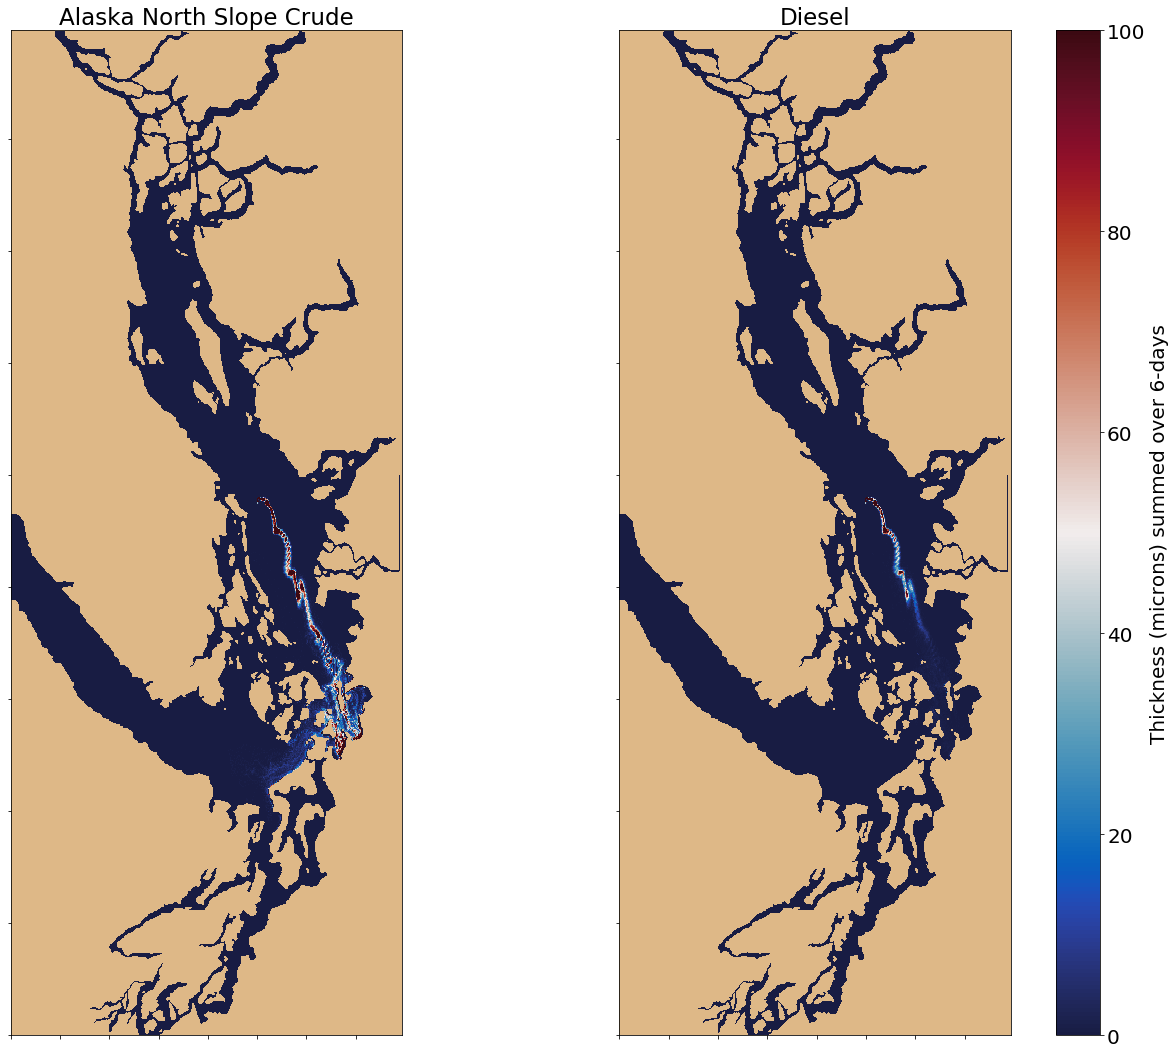

In [14]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(AKNS_thick_s.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)
mappable = ax2.pcolormesh(diesel_thick_s.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax2,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('Alaska North Slope Crude', fontsize = 23)

# remove axis labelsand add titles for diesel graphic
viz_tools.set_aspect(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax2.set_title('Diesel', fontsize = 23)

# add
# add colorbar 
#cbar = fig.colorbar(mappable)
#cbar.set_label('thickness', fontsize = 20)
#cbar.ax.tick_params(labelsize = 20)

# remove the colorbar to have more control on sizing
#test = mappable.colorbar
#test.remove()

# adjust colorbar for AKNS graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Thickness (microns) summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)
cb.remove()

# adjust colorbar for diesel graphic
divider = make_axes_locatable(ax2)
c2 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c2)
cb.set_label('Thickness (microns) summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)

viz_tools.plot_coastline

plt.savefig('./AKNS_Diesel_thickness_05jun2015.jpeg', format='jpeg', dpi = 1000)


FileNotFoundError: [Errno 2] No such file or directory: '~/test.jpeg'

<Figure size 432x288 with 0 Axes>